<a href="https://colab.research.google.com/github/tiaherdi/Traffic-Sign-5/blob/main/Traffic_Sign_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
# Import library

import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns # graph

In [242]:
# Read file from dataset via github 
dataset = pd.read_csv('https://raw.githubusercontent.com/tiaherdi/Traffic-Sign-5/main/covid_impact_on_airport_traffic.csv?token=GHSAT0AAAAAABXA5PPA37IFB23TYU6SFZYUYXBICBQ',index_col='Date',parse_dates=['Date'])
dataset.head()

HTTPError: ignored

# a. Exploratory Data Analysis (EDA)

In [ ]:
# Data distribution based on country
data_per_negara = dataset.groupby("Country").count()
data_per_negara

In [ ]:
# Five earliest data sort by Date
data = dataset.sort_values(by="Date")
data.head()

In [ ]:
# Five latest data after sorted by Date
data.tail()

In [ ]:
# Describing descriptive statistic on Percent of Baseline
data.describe()

In [ ]:
# Feature selection -> get data needed
data = dataset.drop(['AggregationMethod', 'Version', 'ISO_3166_2', 'Geography', 'Centroid', 'State', 'City'], 
                         axis=1)
data = data.sort_values(by="Date")
data.head()

In [ ]:
# Creating DataFrame based on country
data_per_negara = data.groupby('Country')
australia = data_per_negara.get_group('Australia')
canada = data_per_negara.get_group('Canada')
chile = data_per_negara.get_group('Chile')
us  = data_per_negara.get_group('United States of America (the)')

Visualization Percent of Baseline based on country and date

In [ ]:
# Visualization by country
australia.plot(title='Australia')
canada.plot(title='Canada')
chile.plot(title='Chile')
us.plot(title='US')

# b. Time-Series Analysis

In [ ]:
# Percent of Baseline per-country
baseline_au = australia.PercentOfBaseline.sort_index()
baseline_ca = canada.PercentOfBaseline.sort_index()
baseline_cl = chile.PercentOfBaseline.sort_index()
baseline_us = us.PercentOfBaseline.sort_index()

In [ ]:
start = pd.to_datetime('2020-03-16')
end = pd.to_datetime('2020-12-02')
baseline_au = baseline_au[start:end]
print('Sample of Time Series Data (Australia):')
baseline_au.head()

In [ ]:
start = pd.to_datetime('2020-03-16')
end = pd.to_datetime('2020-12-02')
baseline_ca = baseline_ca[start:end]
print('Sample of Time Series Data (Canada):')
baseline_ca.head()

In [ ]:
start = pd.to_datetime('2020-03-16')
end = pd.to_datetime('2020-12-02')
baseline_cl = baseline_cl[start:end]
print('Sample of Time Series Data (Chile):')
baseline_cl.head()

In [ ]:
start = pd.to_datetime('2020-03-16')
end = pd.to_datetime('2020-12-02')
baseline_us = baseline_us[start:end]
print('Sample of Time Series Data (US):')
baseline_us.head()

Plotting Time-Series

In [ ]:
# Plotting time series
# Australia
plt.figure(figsize=(15, 8))
plt.plot(baseline_au, color='blue')
plt.title('Percent of Baseline of Australia', weight='bold', fontsize=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percent of Baseline', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)

In [ ]:
# Canada
plt.figure(figsize=(15, 8))
plt.plot(baseline_ca, color='blue')
plt.title('Percent of Baseline of Canada', weight='bold', fontsize=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percent of Baseline', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)

In [ ]:
# Chile
plt.figure(figsize=(15, 8))
plt.plot(baseline_cl, color='blue')
plt.title('Percent of Baseline of Chile', weight='bold', fontsize=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percent of Baseline', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)

In [ ]:
# US
plt.figure(figsize=(15, 8))
plt.plot(baseline_us, color='blue')
plt.title('Percent of Baseline of US', weight='bold', fontsize=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percent of Baseline', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)

# c. Replacing Missing Data with Estimated Value

In [ ]:
# Australia
range = pd.date_range(start='2020-03-16', end='2020-12-02', freq='D')
ts = baseline_au.index
diff_dates = range.difference(ts)

td = pd.Timedelta(1, 'd') # 1 day
for date in diff_dates:
  prev_val = baseline_au[date-td] # Take earlier value
  baseline_au[date] = prev_val # Throw earlier value

baseline_au.sort_index(inplace=True)
# Set time index frequency as daily
baseline_au.freq="D"

In [ ]:
# Canada
range = pd.date_range(start='2020-03-16', end='2020-12-02', freq='D')
ts = baseline_ca.index
diff_dates = range.difference(ts)

td = pd.Timedelta(1, 'd') # 1 day
for date in diff_dates:
  prev_val = baseline_ca[date-td] # Take earlier value
  baseline_ca[date] = prev_val # Throw earlier value

baseline_ca.sort_index(inplace=True)
# Set time index frequency as daily
baseline_ca.freq="D"

In [ ]:
# Chile
range = pd.date_range(start='2020-03-16', end='2020-12-02', freq='D')
ts = baseline_cl.index
diff_dates = range.difference(ts)

td = pd.Timedelta(1, 'd') # 1 day
for date in diff_dates:
  prev_val = baseline_cl[date-td] # Take earlier value
  baseline_cl[date] = prev_val # Throw earlier value

baseline_cl.sort_index(inplace=True)
# Set time index frequency as daily
baseline_cl.freq="D"

In [ ]:
# US
range = pd.date_range(start='2020-03-16', end='2020-12-02', freq='D')
ts = baseline_us.index
diff_dates = range.difference(ts)

td = pd.Timedelta(1, 'd') # 1 day
for date in diff_dates:
  prev_val = baseline_us[date-td] # Take earlier value
  baseline_us[date] = prev_val # Throw earlier value

baseline_us.sort_index(inplace=True)
# Set time index frequency as daily
baseline_us.freq="D"

# d. Split Data for Training and **Testing**

**Australia**

In [ ]:
# We use 80% of data Percent of Baseline for train data, 20% for test data
split_time = int(0.8 * len(baseline_au))

train_au = baseline_au[:split_time]
test_au = baseline_au[split_time:]

In [ ]:
# Display a plot of train and test split
fig = plt.figure(figsize=(20,8))
plt.plot(train_au, color='blue', label='Training')
plt.plot(test_au, color='red', label='Testing')
plt.xlabel('Date')
plt.ylabel('Percent of Baseline')
plt.title('Australia')
plt.legend()
plt.show()

**Canada**

In [ ]:
# We use 80% of data Percent of Baseline for train data, 20% for test data
split_time = int(0.8 * len(baseline_ca))

train_ca = baseline_ca[:split_time]
test_ca= baseline_ca[split_time:]

In [ ]:
# Display a plot of train and test split
fig = plt.figure(figsize=(20,8))
plt.plot(train_ca, color='blue', label='Training')
plt.plot(test_ca, color='red', label='Testing')
plt.xlabel('Date')
plt.ylabel('Percent of Baseline')
plt.title('Canada')
plt.legend()
plt.show()

**Chile**

In [ ]:
# We use 80% of data Percent of Baseline for train data, 20% for test data
split_time = int(0.8 * len(baseline_cl))

train_cl = baseline_cl[:split_time]
test_cl = baseline_cl[split_time:]

In [ ]:
# Display a plot of train and test split
fig = plt.figure(figsize=(20,8))
plt.plot(train_cl, color='blue', label='Training')
plt.plot(test_cl, color='red', label='Testing')
plt.xlabel('Date')
plt.ylabel('Percent of Baseline')
plt.title('Chile')
plt.legend()
plt.show()

**US**

In [ ]:
# We use 80% of data Percent of Baseline for train data, 20% for test data
split_time = int(0.8 * len(baseline_us))

train_us = baseline_us[:split_time]
test_us = baseline_us[split_time:]

In [ ]:
# Display a plot of train and test split
fig = plt.figure(figsize=(20,8))
plt.plot(train_us, color='blue', label='Training')
plt.plot(test_us, color='red', label='Testing')
plt.xlabel('Date')
plt.ylabel('Percent of Baseline')
plt.title('Chile')
plt.legend()
plt.show()

# e. Window Dataset

In [ ]:
# Australia
# Creates a windowed dataset
WINDOW = 15 

train_data_au = tf.data.Dataset.from_tensor_slices(train_au.values) # convert to TensorSliceDataset
train_data_au = train_data_au.window(WINDOW+1, shift=1, drop_remainder=True) # takes window size+1
train_data_au = train_data_au.flat_map(lambda x: x.batch(WINDOW+1)) # flattens windowed data
train_data_au = train_data_au.map(lambda x: (x[:-1], x[-1])) # creates features and target tuple

train_data_au = train_data_au.shuffle(1_000) # shuffles dataset Australia

train_data_au = train_data_au.batch(32).prefetch(1) # creates batches of windows

In [ ]:
# Canada
# Creates a windowed dataset
WINDOW = 15 

train_data_ca = tf.data.Dataset.from_tensor_slices(train_ca.values) # convert to TensorSliceDataset
train_data_ca = train_data_ca.window(WINDOW+1, shift=1, drop_remainder=True) # takes window size+1
train_data_ca = train_data_ca.flat_map(lambda x: x.batch(WINDOW+1)) # flattens windowed data
train_data_ca = train_data_ca.map(lambda x: (x[:-1], x[-1])) # creates features and target tuple

train_data_ca = train_data_ca.shuffle(1_000) # shuffles dataset Canada

train_data_ca = train_data_ca.batch(32).prefetch(1) # creates batches of windows

In [ ]:
# Chile
# Creates a windowed dataset
WINDOW = 15 

train_data_cl = tf.data.Dataset.from_tensor_slices(train_cl.values) # convert to TensorSliceDataset
train_data_cl = train_data_cl.window(WINDOW+1, shift=1, drop_remainder=True) # takes window size+1
train_data_cl = train_data_cl.flat_map(lambda x: x.batch(WINDOW+1)) # flattens windowed data
train_data_cl = train_data_cl.map(lambda x: (x[:-1], x[-1])) # creates features and target tuple

train_data_cl = train_data_cl.shuffle(1_000) # shuffles dataset Chile

train_data_cl = train_data_cl.batch(32).prefetch(1) # creates batches of windows

In [ ]:
# US
# Creates a windowed dataset
WINDOW = 15 

train_data_us = tf.data.Dataset.from_tensor_slices(train_us.values) # convert to TensorSliceDataset
train_data_us = train_data_us.window(WINDOW+1, shift=1, drop_remainder=True) # takes window size+1
train_data_us = train_data_us.flat_map(lambda x: x.batch(WINDOW+1)) # flattens windowed data
train_data_us = train_data_us.map(lambda x: (x[:-1], x[-1])) # creates features and target tuple

train_data_us = train_data_us.shuffle(1_000) # shuffles dataset US

train_data_us = train_data_us.batch(32).prefetch(1) # creates batches of windows

# f. Callback

In [ ]:
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae') < 10.0:
            print("MAE under 10.0... Stopping training")
            self.model.stop_training = True

my_callback = CustomCallback()

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

#creates a function that updates the learning rate based on the epoch number
def scheduler(epoch, lr):
    if epoch < 2:
        return 0.01
    else:
        return lr * 0.99

lr_scheduler = LearningRateScheduler(scheduler)

# g. Build the Model

**Australia**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, LSTM, Dropout, Lambda, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

mixed_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[WINDOW]), Conv1D(filters=64, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

In [ ]:
mixed_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

mixed_model.summary()

In [240]:
#Trains Mixed Model
mixed_history = mixed_model.fit(
    train_data_au,
    epochs=30,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)

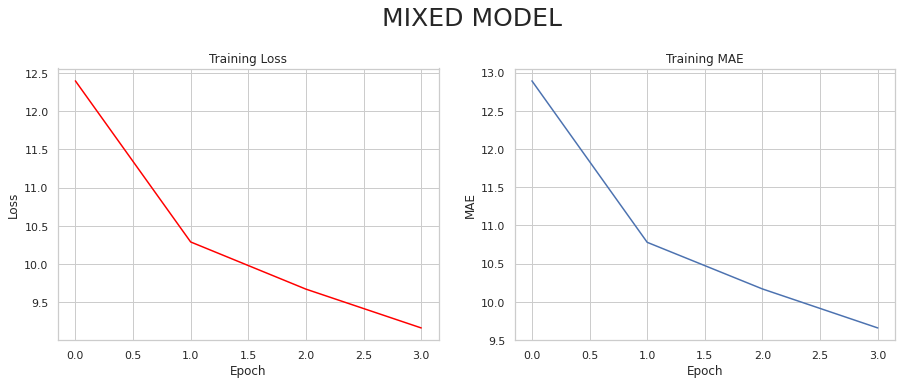

					FINAL LOSS: 9.16 | FINAL MAE: 9.66


In [246]:
# Plots training history
# Plots history of model training
plt.rcParams["figure.figsize"] = (15,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(mixed_history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(mixed_history.history['mae'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].set_title('Training MAE')

fig.text(0.425,1, 'MIXED MODEL', {'size':25})
plt.show()

print("\t\t\t\t\tFINAL LOSS: {} | FINAL MAE: {}".format(
                                                round(mixed_history.history['loss'][-1], 2),
                                                 round(mixed_history.history['mae'][-1], 2)))


**Canada**

In [ ]:
mixed_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[WINDOW]), Conv1D(filters=64, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

In [ ]:
mixed_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

mixed_model.summary()

In [ ]:
#Trains Mixed Model
mixed_history = mixed_model.fit(
    train_data_ca,
    epochs=100,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)

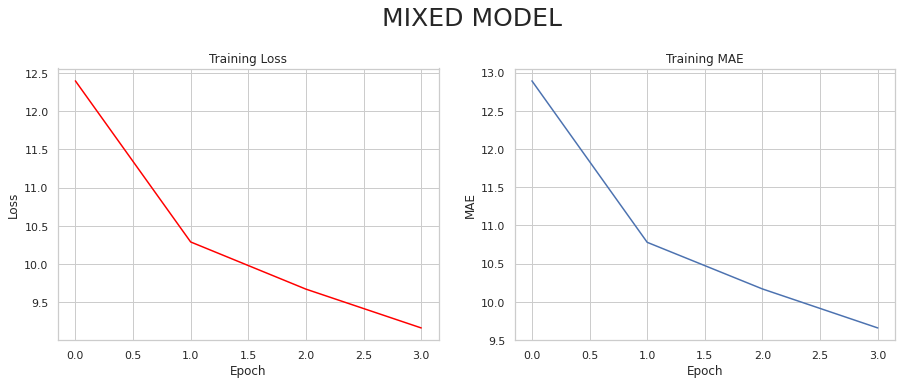

					FINAL LOSS: 9.16 | FINAL MAE: 9.66


In [247]:
# Plots training history
# Plots history of model training
plt.rcParams["figure.figsize"] = (15,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(mixed_history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(mixed_history.history['mae'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].set_title('Training MAE')

fig.text(0.425,1, 'MIXED MODEL', {'size':25})
plt.show()

print("\t\t\t\t\tFINAL LOSS: {} | FINAL MAE: {}".format(
                                                round(mixed_history.history['loss'][-1], 2),
                                                 round(mixed_history.history['mae'][-1], 2)))


**Chile**

In [ ]:
mixed_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[WINDOW]), Conv1D(filters=64, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

In [ ]:
mixed_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

mixed_model.summary()

In [244]:
#Trains Mixed Model
mixed_history = mixed_model.fit(
    train_data_cl,
    epochs=100,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)

MAE under 10.0... Stopping training


In [ ]:
# Plots training history
# Plots history of model training
plt.rcParams["figure.figsize"] = (15,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(mixed_history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(mixed_history.history['mae'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].set_title('Training MAE')

fig.text(0.425,1, 'MIXED MODEL', {'size':25})
plt.show()

print("\t\t\t\t\tFINAL LOSS: {} | FINAL MAE: {}".format(
                                                round(mixed_history.history['loss'][-1], 2),
                                                 round(mixed_history.history['mae'][-1], 2)))


**US**

In [ ]:
mixed_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[WINDOW]), Conv1D(filters=64, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

In [ ]:
mixed_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

mixed_model.summary()

In [ ]:
#Trains Mixed Model
mixed_history = mixed_model.fit(
    train_data_us,
    epochs=100,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)

In [ ]:
# Plots training history
# Plots history of model training
plt.rcParams["figure.figsize"] = (15,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(mixed_history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(mixed_history.history['mae'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].set_title('Training MAE')

fig.text(0.425,1, 'MIXED MODEL', {'size':25})
plt.show()

print("\t\t\t\t\tFINAL LOSS: {} | FINAL MAE: {}".format(
                                                round(mixed_history.history['loss'][-1], 2),
                                                 round(mixed_history.history['mae'][-1], 2)))


# h. Forecast Data

**Australia**

In [ ]:
# Chunck of data to be windowed so that each window associated to a value in test set
forecast_data_au = train_au[-WINDOW:].append(test_au[:-1]).values

In [ ]:
model_forecasts_au = {'MIXED MODEL': []}

#converts values to TensorSliceDataset
test_data_au = tf.data.Dataset.from_tensor_slices(forecast_data_au) 
    #takes window size  slices of the dataset
test_data_au = test_data_au.window(WINDOW, shift=1, drop_remainder=True)
    #flattens windowed data by batching 
test_data_au = test_data_au.flat_map(lambda x: x.batch(WINDOW+1))
    #creates batches of windows
test_data_au = test_data_au.batch(32).prefetch(1)
    #gets model prediction 
preds_au = mixed_model.predict(test_data_au)
    #append to forecast dict
model_forecasts_au['MIXED MODEL'].append(preds_au)

In [245]:
N = test_au.values.shape[0] #number of samples in test set
mix_mae = np.abs(test_au.values - model_forecasts_au['MIXED MODEL'][0].squeeze()).sum() / N
print('MIXED MAE:', round(mix_mae, 2))

NameError: ignored

In [ ]:
#displays forecasted data
plt.rcParams["figure.figsize"] = (15,20)
fig, axs = plt.subplots(4, 1)

#Mixed Model Forecast
axs[2].plot(test_au.values, color='black', linestyle='--', label='Actual Value')
axs[2].plot(model_forecasts_au['MIXED MODEL'][0].squeeze(), color='red', label='Mixed')
axs[2].set_title('MIXED MODEL FORECAST')
axs[2].legend()

**Canada**

In [ ]:
# Chunck of data to be windowed so that each window associated to a value in test set
forecast_data_ca = train_ca[-WINDOW:].append(test_ca[:-1]).values

In [ ]:
model_forecasts_ca = {'MIXED MODEL': []}

#converts values to TensorSliceDataset
test_data_ca = tf.data.Dataset.from_tensor_slices(forecast_data_ca) 
    #takes window size  slices of the dataset
test_data_ca = test_data_ca.window(WINDOW, shift=1, drop_remainder=True)
    #flattens windowed data by batching 
test_data_ca = test_data_ca.flat_map(lambda x: x.batch(WINDOW+1))
    #creates batches of windows
test_data_ca = test_data_ca.batch(32).prefetch(1)
    #gets model prediction 
preds_ca = mixed_model.predict(test_data_ca)
    #append to forecast dict
model_forecasts_ca['MIXED MODEL'].append(preds_ca)

In [ ]:
N = test_ca.values.shape[0] #number of samples in test set
mix_mae = np.abs(test_au.values - model_forecasts_ca['MIXED MODEL'][0].squeeze()).sum() / N
print('MIXED MAE:', round(mix_mae, 2))

In [ ]:
#displays forecasted data
plt.rcParams["figure.figsize"] = (15,20)
fig, axs = plt.subplots(4, 1)

#Mixed Model Forecast
axs[2].plot(test_ca.values, color='black', linestyle='--', label='Actual Value')
axs[2].plot(model_forecasts_ca['MIXED MODEL'][0].squeeze(), color='red', label='Mixed')
axs[2].set_title('MIXED MODEL FORECAST')
axs[2].legend()

**Chile**

In [ ]:
# Chunck of data to be windowed so that each window associated to a value in test set
forecast_data_cl = train_cl[-WINDOW:].append(test_cl[:-1]).values

In [ ]:
model_forecasts_ca = {'MIXED MODEL': []}

#converts values to TensorSliceDataset
test_data_cl = tf.data.Dataset.from_tensor_slices(forecast_data_cl) 
    #takes window size  slices of the dataset
test_data_cl = test_data_cl.window(WINDOW, shift=1, drop_remainder=True)
    #flattens windowed data by batching 
test_data_cl = test_data_cl.flat_map(lambda x: x.batch(WINDOW+1))
    #creates batches of windows
test_data_cl = test_data_cl.batch(32).prefetch(1)
    #gets model prediction 
preds_cl = mixed_model.predict(test_data_cl)
    #append to forecast dict
model_forecasts_cl['MIXED MODEL'].append(preds_cl)

In [ ]:
N = test_cl.values.shape[0] #number of samples in test set
mix_mae = np.abs(test_au.values - model_forecasts_cl['MIXED MODEL'][0].squeeze()).sum() / N
print('MIXED MAE:', round(mix_mae, 2))

In [ ]:
#displays forecasted data
plt.rcParams["figure.figsize"] = (15,20)
fig, axs = plt.subplots(4, 1)

#Mixed Model Forecast
axs[2].plot(test_cl.values, color='black', linestyle='--', label='Actual Value')
axs[2].plot(model_forecasts_cl['MIXED MODEL'][0].squeeze(), color='red', label='Mixed')
axs[2].set_title('MIXED MODEL FORECAST')
axs[2].legend()

**US**

In [ ]:
# Chunck of data to be windowed so that each window associated to a value in test set
forecast_data_us = train_us[-WINDOW:].append(test_us[:-1]).values

In [ ]:
model_forecasts_ca = {'MIXED MODEL': []}

#converts values to TensorSliceDataset
test_data_us = tf.data.Dataset.from_tensor_slices(forecast_data_us) 
    #takes window size  slices of the dataset
test_data_us = test_data_us.window(WINDOW, shift=1, drop_remainder=True)
    #flattens windowed data by batching 
test_data_us = test_data_us.flat_map(lambda x: x.batch(WINDOW+1))
    #creates batches of windows
test_data_us = test_data_us.batch(32).prefetch(1)
    #gets model prediction 
preds_us = mixed_model.predict(test_data_us)
    #append to forecast dict
model_forecasts_us['MIXED MODEL'].append(preds_us)

In [ ]:
N = test_ca.values.shape[0] #number of samples in test set
mix_mae = np.abs(test_au.values - model_forecasts_ca['MIXED MODEL'][0].squeeze()).sum() / N
print('MIXED MAE:', round(mix_mae, 2))

In [ ]:
#displays forecasted data
plt.rcParams["figure.figsize"] = (15,20)
fig, axs = plt.subplots(4, 1)

#Mixed Model Forecast
axs[2].plot(test_ca.values, color='black', linestyle='--', label='Actual Value')
axs[2].plot(model_forecasts_ca['MIXED MODEL'][0].squeeze(), color='red', label='Mixed')
axs[2].set_title('MIXED MODEL FORECAST')
axs[2].legend()